<a href="https://colab.research.google.com/github/LoginovMS/SpecialistPython1/blob/master/%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_Python_01_11_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Данные взяты с сайта https://rp5.ru/Архив_погоды_в_Москве_(ВДНХ)
 
 
Нажимаем кнопку "Выбрать в файл GZ (архив)" и формат файла Excel файлом за интересующий период (с 2016 года). Рядом появляется ссылка "Скачать". Правая кнопка мыши -> Копировать ссылку
 
Пример команды для скачивания (подставить свою ссылку):
 
```!wget -O "weather.xls.gz" "http://93.90.217.253/download/files.synop/27/27612.01.01.2016.16.08.2021.1.0.0.ru.utf8.00000000.xls.gz"```
 
Распаковка архива:
 
```!gzip -df "weather.xls.gz"```
 
Ссылка на вебинар
https://live.skillbox.ru/webinars/code/analiz-dannykh-v-data-science-znakomimsya-s-python011121/

#Скриншот: получение ссылки на датасет

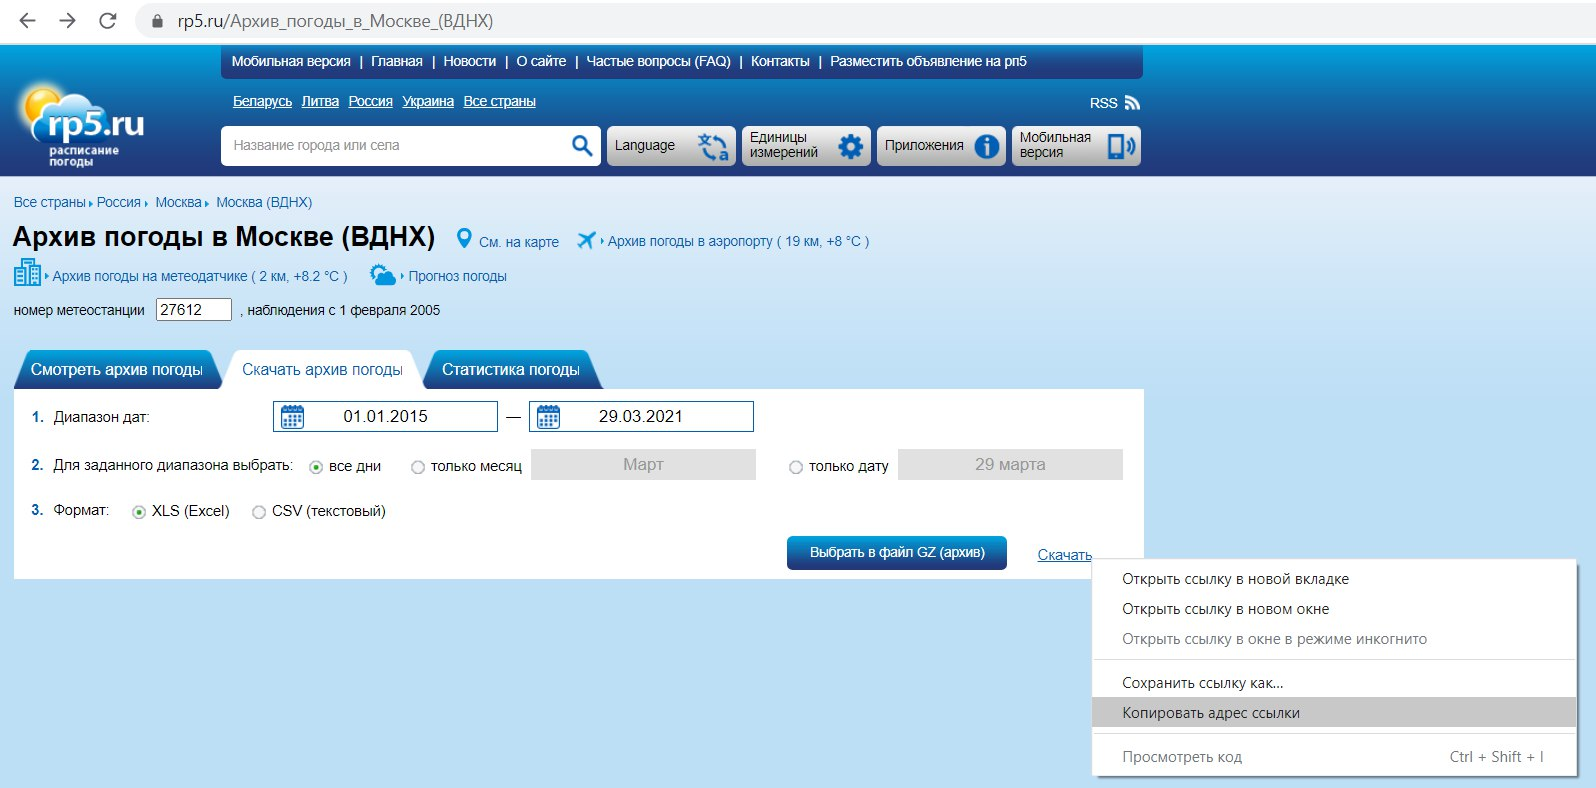

#1. Введение в Python

In [ ]:
# Комментарий начинается со знака "решетка" и заканчивается в конце строки
# Чтобы добавить новую ячейку, нужно нажать кнопку "+Код" в левом верхнем углу, для запуска - Shift+Enter
# Ячейка выведет значение выражения в последней строке (либо значение переменной)

# Переменная - аналог x, y, z в школьных формулах - значение, которому мы дали удобное имя (главное, что оно не начиналось с цифры)
x = 5
y = 11
x + y

16

In [ ]:
# Напечатать значение или результат арифметической операции и т.п. - можно с помощью функции print

# Аргументы, написанные через запятую в круглых скобках напечатаются через пробел
print('Hello, world', x+y)
# Строки (какой-то текст) обозначаются кавычками: одинарными или двойными (главное, симметричными)

# Ячейка исполняется каждый раз заново


Hello, world 16


In [ ]:
# True/False - специальный тип данных, результат выражений сравнения (>, <, ==, >=, ...)
t = 36.6
t > 37.2

False

In [ ]:
# Условные выражения - код в блоке выполнится, если результат выражения после if равен True
# Если условие не выполняется (= False), выполняется блока кода после else
# Блок = код, сдвинутый на одинаковое число отступов вправо. Отступы в начале строки - часть синтаксиса языка

if t < 37.2:
    print('Здоров')
    print('Лечить не нужно')
else:
    print('Болен')

Здоров
Лечить не нужно


In [ ]:
# А что, если значение неизвестно? Например, термометр сломался.
# Специальный тип данных "ничто" (None (pure Python), NaN - not a number (pandas), NaT - not a time (pandas))
None

In [ ]:
# Для того, чтобы писать какие-то программы, нужны списки с данными. Список записывается в квадрадных скобках через запятую
lst = [x, y, x+y, 'Hello!', None]  # 0, 1, 2, 3, 4
lst

[5, 11, 16, 'Hello!', None]

In [ ]:
# В списке можно получить любое значение по его номеру ("адресу") в списке. 
# Нумерация начинается с 0, номер пишется в квадратных скобках

lst[0], lst[-1], lst[2]

(5, None, 16)

#2. Matplotlib: графики

In [ ]:
# Для того, чтобы использовать какой-то функционал сложнее арифметических операций, 
# нужно в явном виде подключить пакет (библиотеку, модуль)

import matplotlib.pyplot as plt

# Эту ячейку нужно обязательно выполнить, чтобы не получить потом ошибку NameError: name 'plt' is not defined

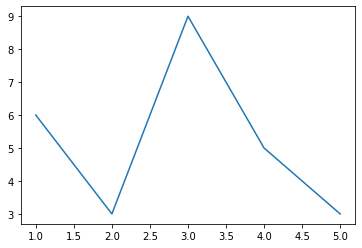

In [ ]:
# Список координат по оси X и Y, передаем их в функцию как аргументы
x = [1, 2, 3, 4, 5]
y = [6, 3, 9, 5, 3]

plt.plot(x, y)

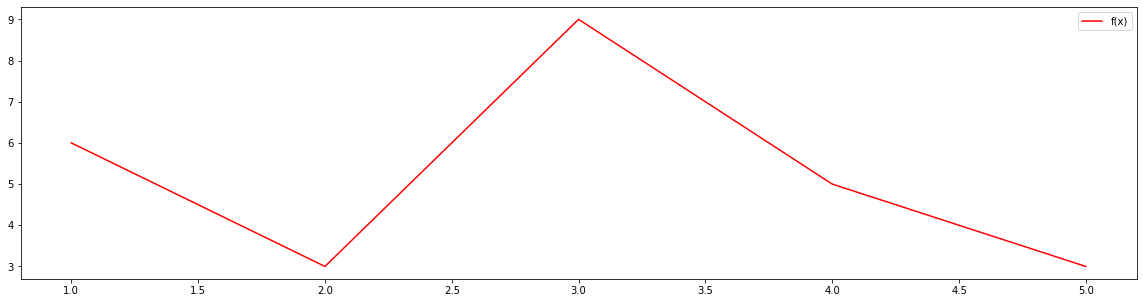

In [ ]:
# Графики можно кастомизировать (и даже приводить к ГОСТУ)

x = [1, 2, 3, 4, 5]
y = [6, 3, 9, 5, 3]


# Изменяем аргумент figsize, 20x5 дюймов
plt.figure(figsize=(20, 5))
# Добавляем лейбл, изменяем цвет
plt.plot(x, y, label='f(x)', color='red')

# Отрисовываем лейбл
plt.legend()

#3. Pandas: таблицы

In [ ]:
# Скачивание файла (подставить свою ссылку)
!wget -O "weather.xls.gz" "http://93.90.217.253/download/files.synop/27/27612.01.01.2016.01.11.2021.1.0.0.ru.utf8.00000000.xls.gz"

--2021-11-01 17:19:12--  http://93.90.217.253/download/files.synop/27/27612.01.01.2016.01.11.2021.1.0.0.ru.utf8.00000000.xls.gz
Connecting to 93.90.217.253:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1411959 (1.3M) [application/octet-stream]
Saving to: ‘weather.xls.gz’

weather.xls.gz      100%[===================>]   1.35M   743KB/s    in 1.9s    

2021-11-01 17:19:14 (743 KB/s) - ‘weather.xls.gz’ saved [1411959/1411959]



In [ ]:
# Распаковка архива
!gzip -df "weather.xls.gz"

In [ ]:
# Подключаем библиотеку pandas для работы с таблицами (стандартный псевдоним - pd)

import pandas as pd

In [ ]:
# Считываем Excel-таблицу в переменную data
data = pd.read_excel('weather.xls')

In [ ]:
# Смотрим, что получилось
# первые 10 строк
data.head(10)

,"# Метеостанция Москва (ВДНХ), Россия, WMO_ID=27612, выборка с 01.01.2016 по 01.11.2021, все дни",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,# Кодировка: UTF-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"# Информация предоставлена сайтом ""Расписание ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"# Пожалуйста, при использовании данных, любезн...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,# Обозначения метеопараметров см. по адресу ht...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
6,01.11.2021 18:00,5,752.8,766.7,0,89,"Штиль, безветрие",0,NaN,NaN,Облаков нет.,Дымка.,Облака покрывали половину неба или менее в теч...,Облака покрывали половину неба или менее в теч...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,3.3,Осадков нет,12,NaN,NaN,NaN,NaN
7,01.11.2021 15:00,8.9,752.8,766.5,-0.6,70,"Ветер, дующий с юга",1,NaN,NaN,Облаков нет.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,3.7,NaN,NaN,NaN,NaN,NaN,NaN
8,01.11.2021 12:00,7,753.4,767.3,0.1,79,"Ветер, дующий с западо-северо-запада",1,NaN,NaN,Облаков нет.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,3.5,NaN,NaN,NaN,NaN,NaN,NaN
9,01.11.2021 09:00,4.5,753.3,767.2,0.3,91,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,60%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,3.4,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",60%.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",9,3.1,Осадков нет,12,NaN,NaN,NaN,NaN


In [ ]:
# Удаляем лишние комментарии (первые 6 строк)
data = pd.read_excel('weather.xls', skiprows=6)
data.head(10)

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,01.11.2021 18:00,5.0,752.8,766.7,0.0,89.0,"Штиль, безветрие",0,NaN,NaN,Облаков нет.,Дымка.,Облака покрывали половину неба или менее в теч...,Облака покрывали половину неба или менее в теч...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.3,Осадков нет,12.0,NaN,NaN,NaN,NaN
1,01.11.2021 15:00,8.9,752.8,766.5,-0.6,70.0,"Ветер, дующий с юга",1,NaN,NaN,Облаков нет.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,3.7,NaN,NaN,NaN,NaN,NaN,NaN
2,01.11.2021 12:00,7.0,753.4,767.3,0.1,79.0,"Ветер, дующий с западо-северо-запада",1,NaN,NaN,Облаков нет.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN
3,01.11.2021 09:00,4.5,753.3,767.2,0.3,91.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,60%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,3.4,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",60%.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",9.0,3.1,Осадков нет,12.0,NaN,NaN,NaN,NaN
4,01.11.2021 06:00,4.5,753.0,766.9,0.0,91.0,"Ветер, дующий с западо-северо-запада",1,NaN,NaN,Облаков нет.,,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,10.0,3.1,Осадков нет,12.0,NaN,NaN,NaN,NaN
5,01.11.2021 03:00,5.6,753.0,766.9,-0.1,87.0,"Ветер, дующий с запада",1,NaN,NaN,Облаков нет.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN
6,01.11.2021 00:00,6.6,753.1,767.0,0.0,84.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,Облаков нет.,Дымка.,Облака покрывали половину неба или менее в теч...,Облака покрывали половину неба или менее в теч...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,31.10.2021 21:00,5.8,753.1,767.1,-0.4,87.0,"Штиль, безветрие",0,NaN,NaN,Облаков нет.,Дымка.,Облака покрывали половину неба или менее в теч...,Облака покрывали половину неба или менее в теч...,NaN,7.5,NaN,NaN,NaN,NaN,NaN,8.0,3.8,Осадков нет,12.0,NaN,NaN,NaN,NaN
8,31.10.2021 18:00,5.8,753.5,767.5,-0.5,80.0,"Штиль, безветрие",0,NaN,NaN,Облаков нет.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,2.6,Осадков нет,12.0,NaN,NaN,NaN,NaN
9,31.10.2021 15:00,7.1,754.0,767.8,-0.9,71.0,"Ветер, дующий с юга",1,NaN,NaN,20–30%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",20.0,2.1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# pandas.DataFrame - таблица, сложный тип данных (формально называется "объект")
# Мало того, что мы можем передавать его как агрумент в другие функции, мы можем
# как из пакета вызывать встроенные функции ("методы") или свойства, внутренние переменные ("атрибуты")

# data.head() - метод
# data.shape - атрибут
data.shape

(17050, 29)

In [ ]:
# Посмотрим на колонки, которые нам доступны
data.columns

Index(['Местное время в Москве (ВДНХ)', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff',
       'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm',
       'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')

In [ ]:
# Данные хранятся а) по столбцам б) по номерам строк
# Столбец - отдельный объект типа pandas.Series
data['Местное время в Москве (ВДНХ)'][4]

'01.11.2021 06:00'

In [ ]:
data['Местное время в Москве (ВДНХ)']

0        01.11.2021 18:00
1        01.11.2021 15:00
2        01.11.2021 12:00
3        01.11.2021 09:00
4        01.11.2021 06:00
               ...       
17045    01.01.2016 12:00
17046    01.01.2016 09:00
17047    01.01.2016 06:00
17048    01.01.2016 03:00
17049    01.01.2016 00:00
Name: Местное время в Москве (ВДНХ), Length: 17050, dtype: object

In [ ]:
# Хотим нарисовать график температуры от времени
# Для этого нужно преобразовать колонку с датами в специальный формат дат 
# (вы можете попробовать дома без преобразования и посмотреть, как все зависло)

# Сейчас там записаны строки в Российском формате - а нужно преобразовать во внутренний питоновский формат
pd.to_datetime(data['Местное время в Москве (ВДНХ)'], dayfirst=True)

0       2021-11-01 18:00:00
1       2021-11-01 15:00:00
2       2021-11-01 12:00:00
3       2021-11-01 09:00:00
4       2021-11-01 06:00:00
                ...        
17045   2016-01-01 12:00:00
17046   2016-01-01 09:00:00
17047   2016-01-01 06:00:00
17048   2016-01-01 03:00:00
17049   2016-01-01 00:00:00
Name: Местное время в Москве (ВДНХ), Length: 17050, dtype: datetime64[ns]

In [ ]:
# Создали новую колонку в правильном формате
data['date'] = pd.to_datetime(data['Местное время в Москве (ВДНХ)'], dayfirst=True)
# Упражнение для любознательных: попробуйте удалить dayfirst=True и посмотреть на график :)

In [ ]:
# Добавим новую колонку в табличку

data['date'] = pd.to_datetime(data['Местное время в Москве (ВДНХ)'], dayfirst=True)


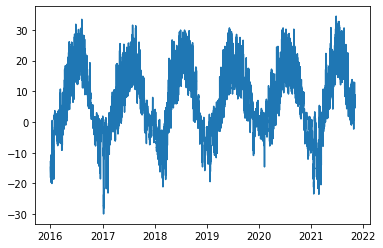

In [ ]:
# Распечатаем график температуры

x = data['date']
y = data['T']

plt.plot(x, y)

In [ ]:
# Нам доступно 100% данных или есть пропуски? Удаляем некорректные данные

empty_condition = data['T'].isna()
data[empty_condition]

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date
3826,11.07.2020 09:00,NaN,746.1,760.8,-4.8,NaN,"Ветер, дующий с северо-запада",2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.4,Осадков нет,12.0,NaN,NaN,NaN,NaN,2020-07-11 09:00:00


In [ ]:
data = data[data['T'].notna()]

In [ ]:
data[data['T'].isna()]

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date


In [ ]:
# Максимум, минимум, среднее

data['T'].min(), data['T'].max(), data['T'].mean()

(-29.9, 34.4, 7.300651064578531)

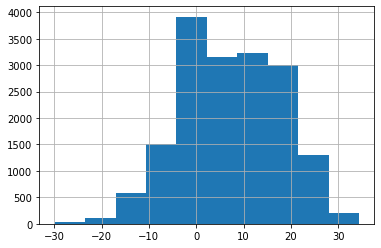

In [ ]:
# Каким температурам будет подвергаться здание чаще всего?

# Гистограмма - график, который показывает, сколько раз встречалось то или иное значение
data['T'].hist()

In [ ]:
# "95-й квантиль равен 23.7 градусам" - если температура не превыает 23.7 градусов в 95% случаев

data['T'].quantile(0.95)

23.7

In [ ]:
# В 90% случаев температура находится в диапазоне от <-9.8> до <23.8> градусов
data['T'].quantile(0.05), data['T'].quantile(0.95)

(-9.7, 23.7)

In [ ]:
# Что нам потребуется для обучения модели - выделение определенных диапазонов данных

# Выбираем данные по условию
condition = data['date'] < '2018-01-01'
data[condition]

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date
11205,31.12.2017 21:00,0.8,745.6,760.4,0.1,96.0,"Штиль, безветрие",0,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,1.6,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,NaN,0.2,4,12.0,NaN,NaN,NaN,NaN,2017-12-31 21:00:00
11206,31.12.2017 18:00,0.9,745.5,760.3,0.8,96.0,"Штиль, безветрие",0,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,NaN,NaN,NaN,0.3,6,12.0,NaN,NaN,NaN,NaN,2017-12-31 18:00:00
11207,31.12.2017 15:00,1.3,744.7,759.5,-0.1,97.0,"Штиль, безветрие",0,NaN,NaN,100%.,Дождь со снегом или ледяная крупа неливневые.,Снег или дождь со снегом.,Дождь.,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,NaN,NaN,4.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-31 15:00:00
11208,31.12.2017 12:00,0.8,744.8,759.6,0.2,97.0,"Штиль, безветрие",0,NaN,NaN,100%.,Снег непрерывный слабый в срок наблюдения.,Снег или дождь со снегом.,Дождь.,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,200-300,Высокослоистые непросвечивающие или слоисто-до...,NaN,4.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-31 12:00:00
11209,31.12.2017 09:00,1.5,744.6,759.3,-0.1,96.0,"Ветер, дующий с юго-юго-востока",1,NaN,NaN,100%.,Дождь незамерзающий непрерывный умеренный в ср...,Дождь.,Облака покрывали более половины неба в течение...,0.7,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,Высокослоистые непросвечивающие или слоисто-до...,NaN,2.0,0.9,5,12.0,NaN,NaN,NaN,NaN,2017-12-31 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17045,01.01.2016 12:00,-15.0,763.2,779.3,0.5,73.0,"Ветер, дующий с востоко-северо-востока",1,NaN,NaN,60%.,Состояние неба в общем не изменилось.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",60%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-18.8,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 12:00:00
17046,01.01.2016 09:00,-14.8,762.7,778.8,0.3,77.0,"Ветер, дующий с востоко-северо-востока",1,NaN,NaN,100%.,Снег непрерывный слабый в срок наблюдения.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,-14.9,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",100%.,"2500 или более, или облаков нет.",Высокослоистые непросвечивающие или слоисто-до...,NaN,10.0,-17.9,0.2,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,3,2016-01-01 09:00:00
17047,01.01.2016 06:00,-14.6,762.4,778.5,0.2,78.0,"Ветер, дующий с северо-востока",2,NaN,NaN,100%.,Снег неливневый.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,-14.6,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",100%.,"2500 или более, или облаков нет.",Высокослоистые непросвечивающие или слоисто-до...,NaN,NaN,-17.7,0.3,12.0,NaN,NaN,NaN,NaN,2016-01-01 06:00:00
17048,01.01.2016 03:00,-14.0,762.2,778.3,0.0,78.0,"Ветер, дующий с северо-востока",1,NaN,NaN,100%.,Снег непрерывный слабый в срок наблюдения.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",100%.,"2500 или более, или облаков нет.",Высокослоистые непросвечивающие или слоисто-до...,NaN,NaN,-17.1,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 03:00:00


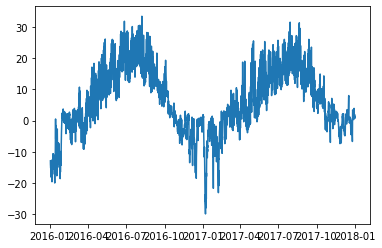

In [ ]:
condition = data['date'] < '2018-01-01'
data_short = data[condition]

x = data_short['date']
y = data_short['T']
plt.plot(x, y)

In [ ]:
# Упражнение для самопроверки (сдавать никуда не нужно, обсуждание в ТГ-чате приветствуется)
# Приблизить график аномалии в 2017 году (например, обрезать с ноября 2016 по март 2017)
# 1) Это упражнение можно сделать скомбинировав код с вебинара
# 2) Есть много способов сделать это в 1 строчку, гуглить можно и нужно (задание со *)